In [1]:
  %matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px



In [2]:
# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles


plt.ion()

In [12]:
# load the outline of Northern Ireland and Ireland
outline = gpd.read_file('data_files/Simplified_Shapes/Ireland.shp')
outline = outline.to_crs(epsg=2158)


#load datasets for display on map
water = gpd.read_file('data_files/Files_for_analysis/water_per_county.shp')
water = water.to_crs(epsg=2158)

counties = gpd.read_file('data_files/Files_for_analysis/Ire_Counties.shp')
counties = counties.to_crs(epsg=2158)

center_counties = gpd.read_file('data_files/Simplified_Shapes/Counties_Center_pts.shp')
#center_counties = center_counties.to_crs(epsg=2158)

In [4]:
water


,FID_,osm_id,code,fclass,population,name,COUNT,COUNT_area,sum_area_s,SHAPE_Leng,SHAPE_Area,geometry
0,0,334898,1041,county,0.0,County Limerick,12.0,12.0,1.640794,4.666724,0.364585,"POLYGON ((475234.167 5824747.850, 475684.690 5..."
1,7,283679,1041,county,0.0,County Cavan,326.0,326.0,65.793049,4.655311,0.264633,"POLYGON ((561384.726 6010212.270, 561384.663 6..."
2,3,335445,1041,county,0.0,County Longford,31.0,31.0,46.945850,2.536513,0.148541,"POLYGON ((563738.398 5942612.346, 563735.238 5..."
3,6,334372,1041,county,0.0,County Tipperary,35.0,35.0,49.233812,6.072922,0.571557,"POLYGON ((535072.881 5845408.127, 535245.110 5..."
4,10,332631,1041,county,0.0,County Cork,186.0,186.0,16.549630,21.811325,0.980186,"MULTIPOLYGON (((409772.431 5716469.862, 409787..."
5,2,335442,1041,county,0.0,County Offaly,14.0,14.0,0.747029,4.777232,0.269099,"POLYGON ((561249.732 5891564.879, 561254.706 5..."
6,9,284368,1041,county,0.0,County Leitrim,183.0,183.0,84.083960,3.864349,0.218362,"POLYGON ((537132.204 6030522.394, 537188.592 6..."
7,13,1118085,1041,county,0.0,County Fermanagh,232.0,232.0,156.810236,4.233919,0.255713,"POLYGON ((553310.939 6035544.613, 553336.738 6..."
8,5,283426,1041,county,0.0,County Waterford,27.0,27.0,2.169216,4.789672,0.244581,"MULTIPOLYGON (((557294.142 5777049.701, 557298..."
9,12,285915,1041,county,0.0,County Laois,8.0,8.0,0.346849,3.267683,0.230039,"POLYGON ((585203.930 5857273.288, 585829.802 5..."


In [5]:
counties




,osm_id,code,fclass,population,name,Field,geometry
0,334898,1041,county,0,Limerick,NaN,"POLYGON ((475234.167 5824747.850, 475684.690 5..."
1,1959598,1041,county,0,Londonderry,NaN,"MULTIPOLYGON (((601961.616 6091904.380, 601974..."
2,335442,1041,county,0,Offaly,0.0,"POLYGON ((561249.732 5891564.879, 561254.706 5..."
3,335445,1041,county,0,Longford,NaN,"POLYGON ((563738.398 5942612.346, 563735.238 5..."
4,335443,1041,county,0,Roscommon,NaN,"POLYGON ((511649.800 5946340.151, 511658.420 5..."
5,283426,1041,county,0,Waterford,NaN,"MULTIPOLYGON (((557294.142 5777049.701, 557298..."
6,334372,1041,county,0,Tipperary,NaN,"POLYGON ((535072.881 5845408.127, 535245.110 5..."
7,283679,1041,county,0,Cavan,NaN,"POLYGON ((561384.726 6010212.270, 561384.663 6..."
8,335330,1041,county,0,Sligo,NaN,"MULTIPOLYGON (((491084.748 6003309.671, 491089..."
9,284368,1041,county,0,Leitrim,NaN,"POLYGON ((537132.204 6030522.394, 537188.592 6..."


In [6]:
#shp_file = geopandas.read_file('myshpfile.shp')
#shp_file.to_file('myshpfile.geojson', driver='GeoJSON')

water = gpd.read_file('data_files/Files_for_analysis/water_per_county.shp')
#water = water.to_crs(epsg=2158)

#water.to_file('data_files/Files_for_analysis/county_water.geojson', driver='GeoJSON')

In [7]:
#county_water = gpd.read_file('data_files/Files_for_analysis/county_water.geojson')

#print (county_water.head())


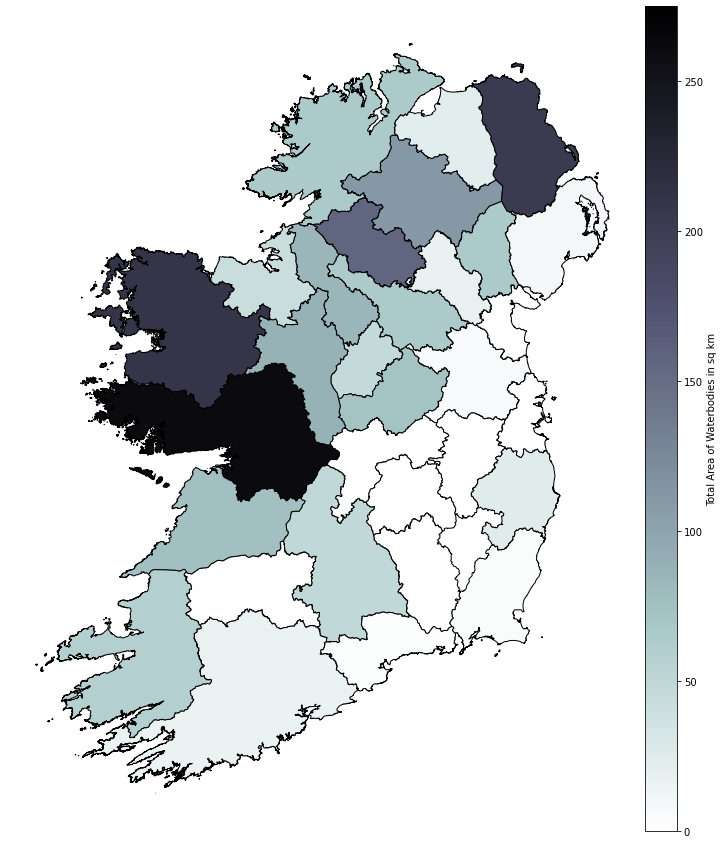

In [40]:
fig, ax = plt.subplots(1, figsize=(12, 18))

# to make a nice colorbar that stays in line with our map, use these lines:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
    
ax = water.plot(column='sum_area_s', ax=ax, vmin=0, vmax=275, cmap='bone_r', edgecolor='k',
                       legend=True, cax=cax, legend_kwds={'label': 'Total Area of Waterbodies in sq km'})
    
 
#Switch off the bounding box drawn round the map so it looks a bit tidier
ax.axis('off');



In [9]:
fig.savefig('Total area of inland water per county in ireland.png', dpi=300, bbox_inches='tight')

In [ ]:
#